In [1]:
%matplotlib inline
import sys
sys.path.append("/Users/mmeier/Desktop/new_arena/")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from scipy import stats
import data_analysis.tools as tools
import data_analysis.calcium_analysis as calcium_analysis
import pylab
from scipy import stats

In [2]:
fly0_LO = np.load('T4T5_ctrl_sp_freq_2016-11-16_16.05LO.npy').mean(1)
fly0_ME = np.load('T4T5_ctrl_sp_freq_2016-11-16_16.05ME.npy').mean(1)
fly0_LP = np.load('T4T5_ctrl_sp_freq_2016-11-16_16.05LP.npy').mean(1)

fly1_LO = np.load('T4T5_ctrl_sp_freq_2016-11-18_19.03LO.npy').mean(1)
fly1_ME = np.load('T4T5_ctrl_sp_freq_2016-11-18_19.03ME.npy').mean(1)
fly1_LP = np.load('T4T5_ctrl_sp_freq_2016-11-18_19.03LP.npy').mean(1)

fly2_LO = np.load('T4T5_ctrl_sp_freq_PDND_2016-11-07_19.10LO.npy').mean(1)
fly2_ME = np.load('T4T5_ctrl_sp_freq_PDND_2016-11-07_19.10ME.npy').mean(1)
fly2_LP = np.load('T4T5_ctrl_sp_freq_PDND_2016-11-07_19.10LP.npy').mean(1)

fly3_LO = np.load('T4T5_ctrl_sp_freq_PDND_2016-11-15_18.01LO.npy').mean(1)
fly3_ME = np.load('T4T5_ctrl_sp_freq_PDND_2016-11-15_18.01ME.npy').mean(1)
fly3_LP = np.load('T4T5_ctrl_sp_freq_PDND_2016-11-15_18.01LP.npy').mean(1)

single_tuningsLO = np.array([fly0_LO, fly1_LO, fly2_LO, fly3_LO])
single_tuningsME = np.array([fly0_ME, fly1_ME, fly2_ME, fly3_ME])
single_tuningsLP = np.array([fly0_LP, fly1_LP, fly2_LP, fly3_LP])

SEM_LO = stats.sem(single_tuningsLO)
SEM_ME = stats.sem(single_tuningsME)
SEM_LP = stats.sem(single_tuningsLP)

mean_tuningLO = np.mean(single_tuningsLO, axis = 0)
mean_tuningME = np.mean(single_tuningsME, axis = 0)
mean_tuningLP = np.mean(single_tuningsLP, axis = 0)

mean_tuning = np.array([mean_tuningLO, mean_tuningME, mean_tuningLP])
SEMs = np.array([SEM_LO, SEM_ME, SEM_LP])

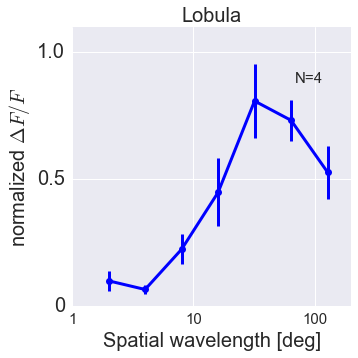

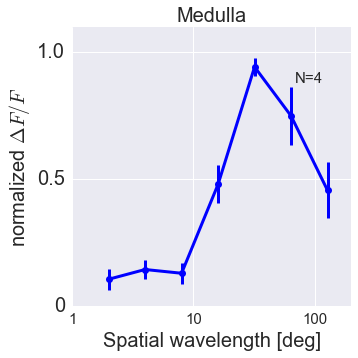

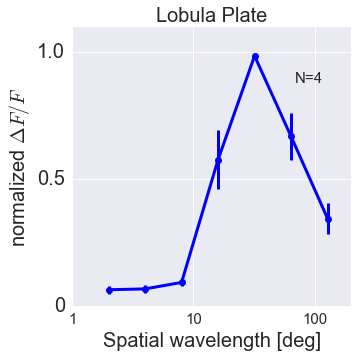

In [5]:
# plot everything

regions = [0,1,2]

for region in regions:
    plt.figure(figsize = (5,5))
    ax = plt.subplot(111)

    # here, we manually define the x-axis
    wavelength_tuning = [2, 4, 8, 16, 32, 64, 128]

    # plot mean tuning as solid line
    plt.errorbar(wavelength_tuning, mean_tuning[region,:], yerr=SEMs[region,:], color = 'b', linewidth = 3.0, marker = 'o')
    plt.xscale('log')

    # define the x-axis and ticks etc...
    ax.set_xlim([2,200])
    ax.set_xticks([1.,10.,100.])
    ax.set_xticklabels([1, 10, 100], fontsize = 15.)
    ax.set_xlabel('Spatial wavelength [deg]', fontsize = 20.)

    # define the y-axis and ticks etc...
    plt.ylim([0,1.1])
    ax.set_yticks([0.0, 0.5, 1.0])
    ax.set_yticklabels([0, 0.5, 1.0], fontsize = 20.)
    ax.set_ylabel('normalized $\Delta F/F$', fontsize = 20.)
    
    if region == 0:
        plt.title ("Lobula", fontsize = 20.)
        open('temp_freq' + 'LO.npy','w')
        np.save('temp_freq' + 'LO.npy', mean_tuning)
        ax.text(0.8, 0.8, "N={0}".format(np.shape(single_tuningsLO)[0]), transform=ax.transAxes, fontsize=15)
        pylab.savefig('temp_freq' + 'LO.png')
    elif region == 1:
        plt.title ("Medulla", fontsize = 20.)
        open('temp_freq' + 'ME.npy','w')
        np.save('temp_freq' + 'ME.npy', mean_tuning)
        ax.text(0.8, 0.8, "N={0}".format(np.shape(single_tuningsLO)[0]), transform=ax.transAxes, fontsize=15)
        pylab.savefig('temp_freq' + 'ME.png')
    elif region == 2:
        plt.title ("Lobula Plate", fontsize = 20.)
        open('temp_freq' + 'LP.npy','w')
        np.save('temp_freq' + 'LP.npy', mean_tuning)
        ax.text(0.8, 0.8, "N={0}".format(np.shape(single_tuningsLO)[0]), transform=ax.transAxes, fontsize=15)
        pylab.savefig('temp_freq' + 'LP.png')
        